In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
     

In [2]:
import os
print(os.getcwd())

C:\Users\sujit


In [3]:
df=pd.read_csv(r"C:\Users\sujit\downloads\traffic volume1.csv")
df.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,2/10/2012,9:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,2/10/2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,2/10/2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,2/10/2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,2/10/2012,13:00:00,4918


In [4]:
df.shape

(48204, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [6]:

df.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [7]:
df.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [8]:
df.head(10)

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,2/10/2012,9:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,2/10/2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,2/10/2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,2/10/2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,2/10/2012,13:00:00,4918
5,NaN,291.72,0.0,0.0,Clear,2/10/2012,14:00:00,5181
6,NaN,293.17,0.0,0.0,Clear,2/10/2012,15:00:00,5584
7,NaN,293.86,0.0,0.0,Clear,2/10/2012,16:00:00,6015
8,NaN,294.14,0.0,0.0,Clouds,2/10/2012,17:00:00,5791
9,NaN,293.10,0.0,0.0,Clouds,2/10/2012,18:00:00,4770


In [9]:
print(df.columns)

Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time',
       'traffic_volume'],
      dtype='object')


In [10]:
df.columns=df.columns.str.strip() 
print(df.columns)


Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time',
       'traffic_volume'],
      dtype='object')


In [11]:
from collections import Counter
df.loc[:, 'temp'] = df['temp'].fillna(df['temp'].mean())
df.loc[:, 'rain'] = df['rain'].fillna(df['rain'].mean())
df.loc[:, 'snow'] = df['snow'].fillna(df['snow'].mean())
print(Counter(df['weather']))


Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [12]:
df['weather'] = df['weather'].fillna('Clouds')

In [13]:
print(df.dtypes)

holiday            object
temp              float64
rain              float64
snow              float64
weather            object
date               object
Time               object
traffic_volume      int64
dtype: object


In [14]:
df['holiday'] = df['holiday'].astype('category').cat.codes
df['weather'] = df['weather'].astype('category').cat.codes
df = df.drop(columns=['date', 'Time'])
df.corr()


,holiday,temp,rain,snow,weather,traffic_volume
holiday,1.000000,-0.009096,-0.000207,-0.000857,-0.002343,-0.038054
temp,-0.009096,1.000000,0.009070,-0.019758,-0.033559,0.130034
rain,-0.000207,0.009070,1.000000,-0.000090,0.009542,0.004714
snow,-0.000857,-0.019758,-0.000090,1.000000,0.036662,0.000735
weather,-0.002343,-0.033559,0.009542,0.036662,1.000000,-0.040035
traffic_volume,-0.038054,0.130034,0.004714,0.000735,-0.040035,1.000000


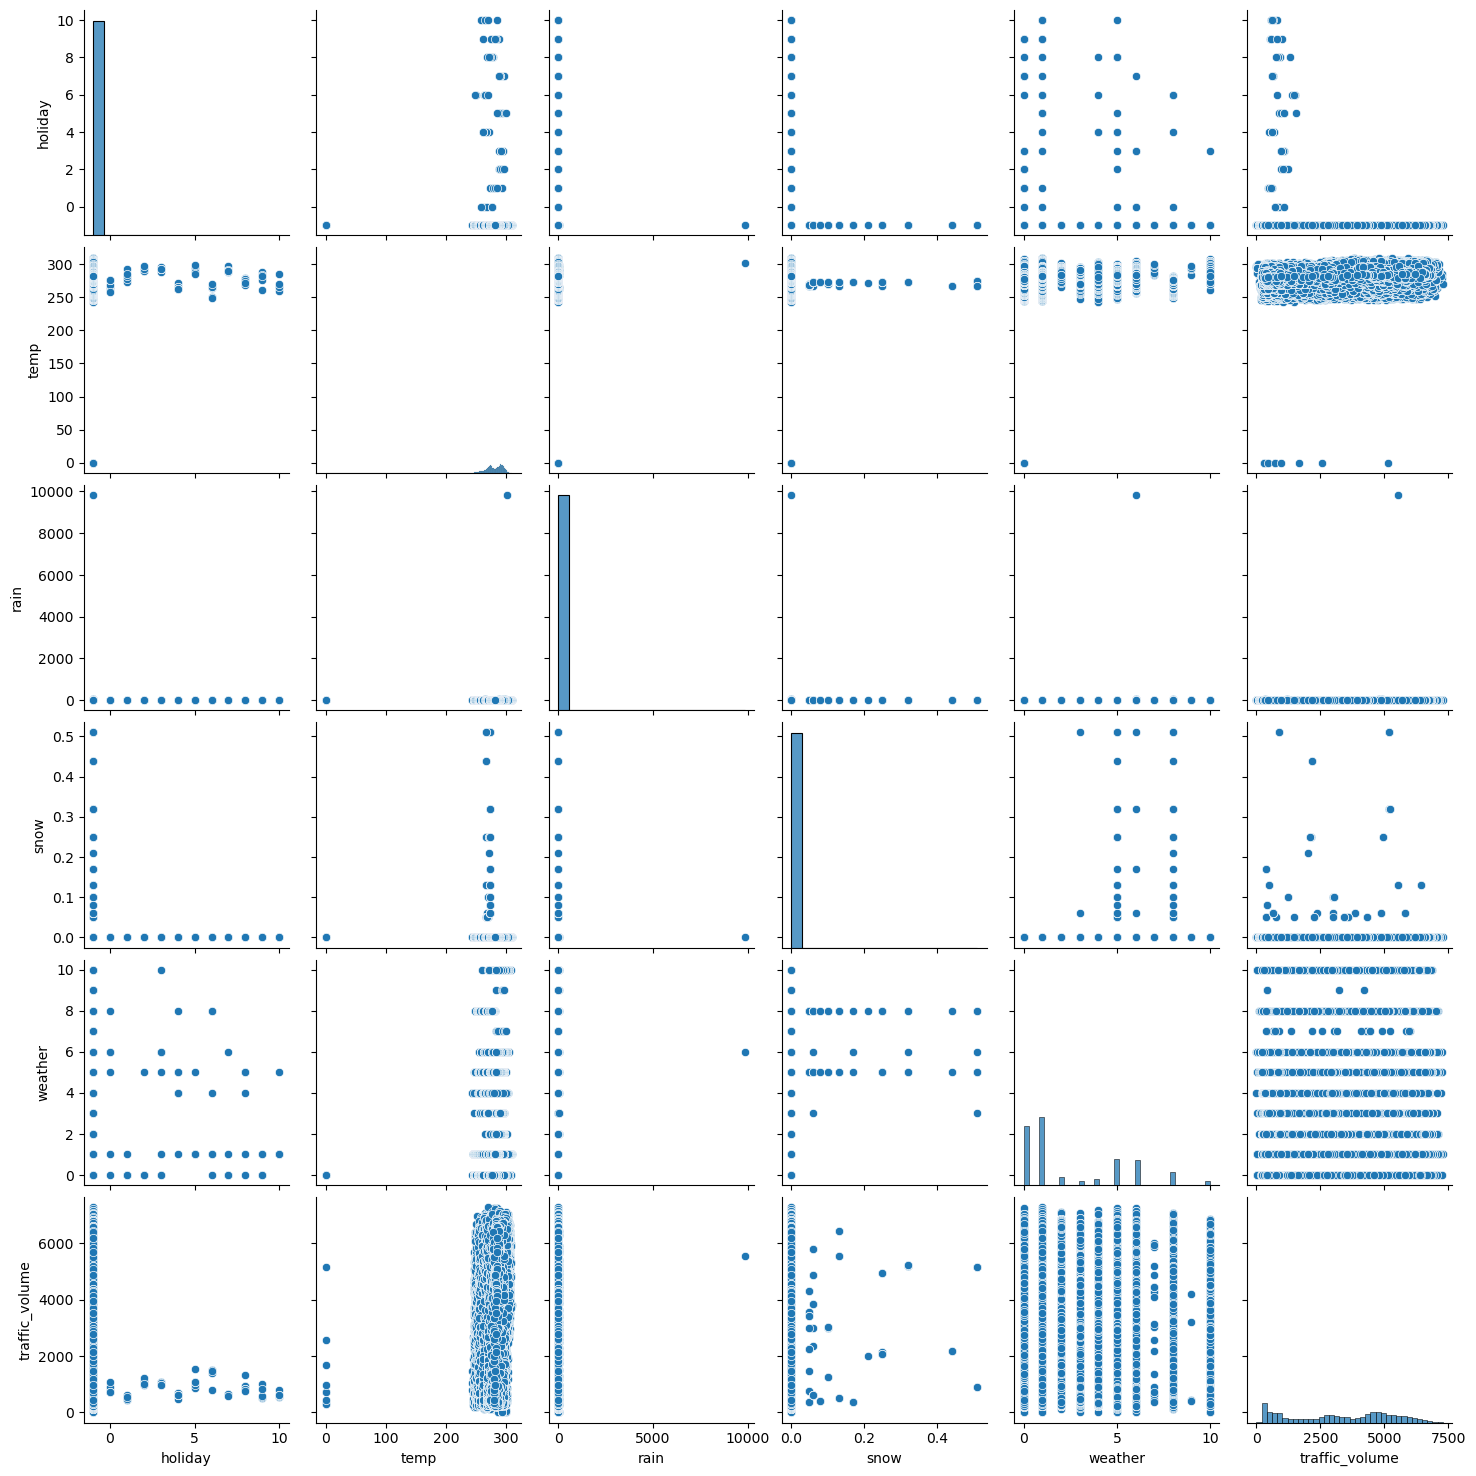

In [16]:
sns.pairplot(df)

<Axes: >

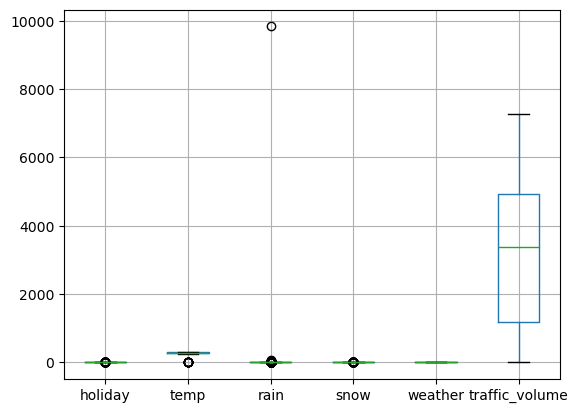

In [17]:
df.boxplot()

In [18]:
print(df.columns)

Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'traffic_volume'], dtype='object')


In [ ]:
df.rename(columns=lambda x:x.strip().lower(),inplace=True)